In [269]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.integrate as integrate
import numpy as np
from IPython.display import HTML

In [270]:
# This block generates H2 from a basis set, distance of 1.4 au (74 pm)

d = 1.4 #au, bond length of H2


# STO-3G minimal basis
a = [3.42525091,0.62391373,0.16885540]        
c = np.asarray([0.15432897,0.53532814,0.44463454])

x = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,x)
Rc = lambda c: np.sqrt((X+c)**2+Y**2) # Generates the R values on the X,Y grid, centered at point 'c'.
orb = lambda r,n: (2*a[n]/np.pi)**(3.0/4)*np.exp(-a[n]*r**2) # Calculates a single gaussian-type orbital
wf = lambda r: orb(r,0)*c[0] + orb(r,1)*c[1] + orb(r,2)*c[2] # Builds the STO from gaussians
result = integrate.quad(lambda r: r**2*4*np.pi*wf(r)**2, 0,np.inf) # Double check normalization

print('Making sure orbitals are normalized: %s' %result[0])

Making sure orbitals are normalized: 0.9999999908897994


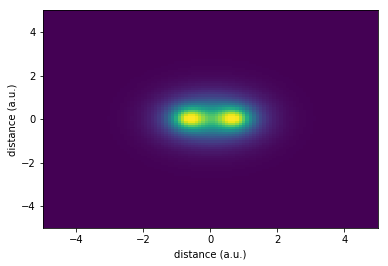

In [271]:
#Plot a cross-section of the electron density around H2
mol = 1.0/2*(wf(Rc(d/2))+wf(Rc(-d/2)))**2
mol = mol/np.sum(mol)
plt.pcolormesh(X,Y,mol,vmax = 0.003)
plt.xlabel('distance (a.u.)')
plt.ylabel('distance (a.u.)')
plt.show()

In [272]:
#Define values and equations
hbar = 1
mu = 918
omega = 8.18*10**14*24.2*10**-27
omega = 0.0005
alpha = mu*omega/hbar 
Hn = np.polynomial.hermite.hermval
coef = lambda n: np.concatenate([np.zeros(n),[1]])
Phi = lambda x,n: (alpha/np.pi)**(1.0/4) * 1.0/(np.sqrt(2**n*np.math.factorial(n)))*Hn(np.sqrt(alpha)*x,coef(n))*np.exp(-alpha*x**2/2)

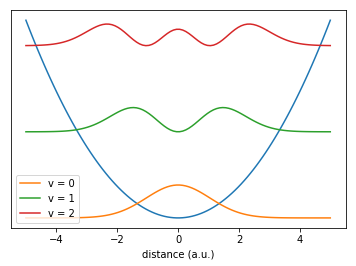

In [273]:
# Plot the harmonic potential
k = omega**2*mu
plt.plot(x,0.5*k*(x)**2*800)

# Plot the first three vibrational eigenfunctions
for n in range(0,3):
    plt.plot(x,Phi(x,n)**2+n,label = 'v = %s' %n)
    
plt.xlabel('distance (a.u.)')
plt.legend()
plt.yticks([])
plt.show()

In [274]:
#  #Plot a 50%/50% superposition of states 1 and 2
#  fig = plt.figure()
#  line, = plt.plot([],[])
# plt.xlim(-5,5)
# plt.ylim(0,1)

# def update(t):
#     at = 1/np.sqrt(2)
#     bt = 1/np.sqrt(2)
#     phase = np.exp(-1j*2*np.pi*t/99)
#     wave_packet = abs(at*Phi(x,0)+bt*Phi(x,1)*phase)**2
#     line.set_data(x,wave_packet)
#     return line,
# anim = animation.FuncAnimation(fig,update,interval=50,blit=True,frames = 100)
# anim.save('animation.gif', writer='imagemagick', fps=10)
# HTML(anim.to_jshtml())

In [288]:

# fig = plt.figure()
# line, = plt.plot([],[])
# plt.xlim(-5,5)
# plt.ylim(0,1)

# def update(t):
#     at = np.cos(0.5*np.pi*t/399)
#     bt = np.sin(0.5*np.pi*t/399)
#     phase = np.exp(-1j*3*2*np.pi*t/199)
#     wave_packet = abs(at*Phi(x,0)+bt*Phi(x,1)*phase)**2
#     line.set_data(x,wave_packet)
#     return line,
# anim = animation.FuncAnimation(fig,update,interval=50,blit=True,frames = 400)
# anim.save('excite.gif', writer='imagemagick', fps=10)
# #HTML(anim.to_jshtml())

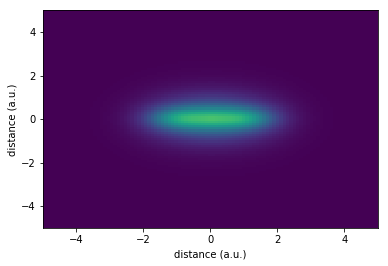

In [276]:
# Mix electronic and nuclear wave functions
comb = 0
for i in x:
 comb += 1.0/2*((wf(Rc(i/2))+wf(Rc(-i/2)))*Phi(i-2,0))**2
comb = comb/np.sum(comb)
plt.pcolormesh(X,Y,comb,vmax=0.003)
plt.xlabel('distance (a.u.)')
plt.ylabel('distance (a.u.)')
plt.show()

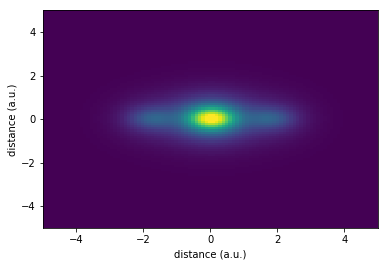

In [280]:
# Mix electronic and nuclear wave functions
comb = 0
for i in x:
 comb += 1.0/2*((wf(Rc(i/2))+wf(Rc(-i/2)))*Phi(i-2,1))**2

comb = comb/np.sum(comb)
plt.pcolormesh(X,Y,comb,vmax=0.003)
plt.xlabel('distance (a.u.)')
plt.ylabel('distance (a.u.)')
plt.show()

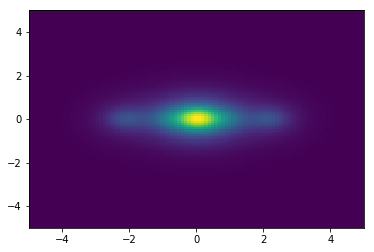

In [278]:
# Mix electronic and nuclear wave functions
comb = 0
for i in x:
 comb += 1.0/2*((wf(Rc(i/2))+wf(Rc(-i/2)))*Phi(i-2,2))**2
comb = comb/np.sum(comb)
plt.pcolormesh(X,Y,comb,vmax=0.003)
plt.show()

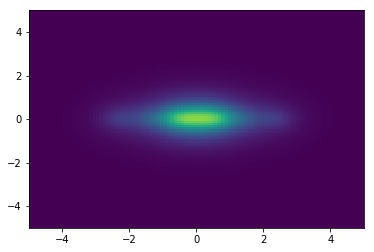

In [279]:
# Mix electronic and nuclear wave functions
comb = 0
for i in x:
 comb += 1.0/2*((wf(Rc(i/2))+wf(Rc(-i/2)))*Phi(i-2,3))**2
comb = comb/np.sum(comb)
plt.pcolormesh(X,Y,comb,vmax=0.003)
plt.show()